# Dando Olhos a Máquina: Redes Neurais Convolucionais

Redes neurais convolucionais são uma classe de modelos de aprendizado de máquina amplamente utilizado em problemas em que os dados estão organizados em grade, como séries temporais, análise de texto e reconhecimento de imagem. Nosso objetivo aqui é construir uma pequena rede neural convolucional para passar em um simples teste de Turin: o teste de Turing público completamente automatizado para diferenciação entre computadores e humanos, ou simplesmente **CAPCHA**.


## A tarefa de enxergar:
No [segundo episódio de Cosmos: A Spacetime Odyssey](http://www.dailymotion.com/video/x2i7wy4), Neil deGrasse Tyson nos mostra que o olho humano é tão mais complexo do que qualquer aparelho criado pelo homem que inclusive já foi utilizado como argumento contra a teoria da evolução: como o acaso evolutivo poderia ter produzido algo tão elaborado? De fato, nós humanos somos tão bons em enxergar que ignoramos verdadeira complexidade dessa tarefa: ao compreender uma imagem, temos que lidar com variações de luminosidade e ponto de vista, temos que segmentar a imagem em vários objetos e levar em conta a complexidade dos significados de cada um deles; em algumas cenas, precisamos detectar objetos parcialmente ocultos ou deformados... 

Para tornar essa tarefa mais fácil, nós humanos conseguimos ter noção de profundidade graças a habilidade de mover nas cenas que enxergamos e do fato de termos dois olhos, conseguindo assim estereopsia. No entanto, as imagens que gostaríamos que as máquinas reconhecessem são digitais, em 2D e estáticas, tornando a tarefa ainda mais difícil. Mesmo assim, com a melhora da capacidade computacional e avanços nos algoritmos de inteligência artificial, já é possível treinar [redes neurais](https://arxiv.org/abs/1512.00567) que são melhores do que humanos em reconhecimento de imagens.


### Uma breve introdução às redes neurais

Em aprendizado de máquina clássico, um problema que sempre aparece independente do algorítimo utilizado é que a tarefa mais difícil não é treinar a máquina, mas sim engenhar variáveis que auxiliem no aprendizado. Em reconhecimento de imagem, um exemplo de como isso acontece pode ser visto nos inúmeros e nada simples pré-processamentos que a imagem passa antes de ser alimentada a um algoritmo de aprendizado de máquina: filtros de ruído, segmentação, aumento de contraste, detecção de contornos, etc. As redes neurais surgem como forma de resolver esse problema: em vez de necessitarem de alguém para criar variáveis representativas manualmente, as redes neurais são capazes de aprendê-las sozinhas. Esse campo de aprendizado de máquina, distinto do de aprendizado de máquina clássico, leva o nome de aprendizado de representações, onde além de aprender um mapeamento entre características representativas e um *output* desejado, a máquina consegue aprender as próprias características representativas, automaticamente.

Do ponto de vista matemático, redes neurais podem ser vistas como uma extensão não tão complicada de modelos de regressão linear (para problemas de regressão) ou logística (para problemas de classificação). Em regressão linear, temos um modelo da forma $\pmb{y} = \pmb{X}\pmb{w} + \pmb{\epsilon}$ e aprendemos parâmetros $\pmb{\hat{w}}$ de forma a minimizar a o quadrado da diferença ente o valor previso e o observado: $(\pmb{y} - \pmb{X}\pmb{\hat{w}})^T(\pmb{y} - \pmb{X}\pmb{\hat{w}})$. Em regressão logística, nós aprendemos os mesmos parâmetros $\pmb{\hat{w}}$ de uma função linear $\pmb{z}=\pmb{X}\pmb{\hat{w}}$, mas agora passamos o resultado dessa transformação por uma função de achatamento, geralmente a função logística ou a função *softmax*, de forma que podemos interpretar o resultado como uma probabilidade. Nós então minimizamos a entropia cruzada entre a probabilidade prevista e a classe observada. Nesse caso, o modelo é $\pmb{y} = \sigma(\pmb{X}\pmb{w}) + \pmb{\epsilon}$, em que $\sigma$ é a função de achatamento. Voltando ao caso de regressão, chamemos a nossa função erro $(\pmb{y} - \pmb{X}\pmb{\hat{w}})^T(\pmb{y} - \pmb{X}\pmb{\hat{w}})$ de $L$ para simplificar a notação.

Basta que possamos calcular as derivadas dos parâmetros com respeito ao custo, $\frac{\partial L}{\partial \pmb{\hat{w}}}$, para que possamos aprender os parâmetros $\hat{w}$ com um algoritmos de otimização iterativa chamado gradiente descendente. De forma geral, isso sempre será o caso se as funções que levam de $\pmb{X}$ para a previsão de $\pmb{y}$, $\pmb{\hat{y}}$, forem diferenciáveis. Poderemos então propagar as derivadas da função custo de trás para frente, por meio da regra da cadeia. Isso é fácil de perceber no caso de regressão logística, se a visualizarmos como uma sequência de camadas: $\pmb{X}\hat{\pmb{w}} \rightarrow \pmb{z} \rightarrow \sigma(\pmb{z}) \rightarrow \pmb{\hat{y}} \rightarrow L(\hat{\pmb{w}})$. Nós então temos as derivadas fluindo no outro sentido: $\frac{\partial L(\hat{\pmb{w}})}{\partial \pmb{\hat{w}}}=\frac{\partial L(\hat{\pmb{w}})}{\partial \pmb{\hat{y}}} \frac{\partial \pmb{\hat{y}}}{\partial \pmb{z}} \frac{\partial \pmb{z}}{\partial \pmb{\hat{w}}}$.

Uma rede neural artificial (RNA) é quando aninhamos transformações lineares, como as descritas acima, seguida por alguma função não linear aplicada elemento a elemento da matriz de entrada. No caso de um problema de regressão teríamos:

$$\pmb{y} = \phi(\pmb{X}\pmb{W}_1)\pmb{w} + \pmb{\epsilon}$$

Em que $\phi$ é alguma função não linear, normalmente a função ReLU (unidade linear retificada) devido a sua simplicidade. Note como a única diferença entre essa forma funcional e a de regressão linear é a matriz $\phi(\pmb{X}\pmb{W}_1)$, que é chamada de camada oculta da rede neural. As colunas da matriz $\phi(\pmb{X}\pmb{W}_1)$ são normalmente chamadas de neurônios da camada oculta. Cada um desses neurônios (ou colunas) pode ser visto como uma nova variável que a rede neural aprende. Uma vez que essas variáveis forem aprendidas, nós podemos abstrair a matriz $\phi(\pmb{X}\pmb{W}_1)$ por uma nova matriz de variáveis - chamemos de $\pmb{X}^*$. Nós então prosseguimos normalmente com a forma funcional de regressão linear: $\pmb{y} = \pmb{X}^*\pmb{w} + \pmb{\epsilon}$. O mesmo raciocínio se aplica no casso de regressão logística. 

Adicionar mais camadas ocultas à rede neural é tão simples como o passo que demos para irmos de regressão linear para RNAs. Por exemplo, para chegar em uma rede neural de duas camadas basta aninharmos mais uma multiplicação de matrizes, seguida de uma função não linear aplicada elemento a elemento:

$$\pmb{y} = \phi(\phi(\pmb{X}\pmb{W}_1)\pmb{W}_2)\pmb{w} + \pmb{\epsilon}$$

Redes neurais com mais de uma camada oculta são chamadas de redes neurais profundas e são o objeto de estudo principal da ciência de *Deep Learning*. Podemos pensar em cada camada oculta da RNA como um nível de abstração que a máquina aprende. Por exemplo, em reconhecimento de imagens, uma primeira camada oculta pode aprende a detectar linhas e curvas de contornos, enquanto camadas mais superiores aprender a juntar esses contornos para detectar objetos. Por fim, podemos interpretar a camada final da rede neural como uma quantidade de variáveis representativas do objeto a ser reconhecido, como por exemplo as as características de um cachorro que que o distinguirão de um lobo. Normalmente, alimentamos um modelo linear com essas característica, mas nada impede que utilizemos essas mesmas variáveis representativas em conjunto com um algorítimo de aprendizado mais poderoso, como uma máquina de suporte vetoriais ou uma árvore de decisão. 

Contato que saibamos diferenciar as funções de todas as camada, podemos utilizar gradiente descendente e treinar uma rede neural da mesma forma que uma regressão logística ou linear. No entanto, a superfície de custo de uma RNA é muito mais complexa do que a de um modelo linear, tornando o processo de treinamento muito mais demorado de difícil.


## Uma breve introdução às redes neurais convolucionais

O modelo de RNA que descrevemos acima é chamado de totalmente conectado, ou denso, pois os neurônios de uma camada são conectados com todos os neurônios da camada seguinte - como é possível perceber pela multiplicação de matrizes que acontece de uma camada para outra. Esse tipo de rede neural é extremamente abundante em parâmetros, podendo gerar problemas computacionais de armazenamentos. Por exemplo, considere o caso em o que a matriz de entrada $\pmb{X}$ contém imagens coloridas (RGB), com altura de 40 e largura de 140 px. Nesse caso, as colunas de $\pmb{X}$) somariam 16800 dimensões (3x140x40). Se conectarmos à entrada uma pequena camada oculta, com apenas 10 neurônios, teríamos 168000 parâmetros $\hat{w}$ para aprender, apenas na primeira camada!

Ao fazer com que vários neurônios dividam o mesmo parâmetro $\hat{w}$, redes convolucionais (RNC) se propõe a resolver esse tipo de problema. Além de diminuir o número de parâmetros, as RNC os estruturam de forma a induzir um conhecimento a priori de que os dados estão em formato de grade, como é o caso de imagens:

<img src="book_imgs/convnet_ws.png">

Na imagem acima, a o compartilhamento de mesmos parâmetros é demostrado pela cor da seta. Nós chamamos o quadriculado com os parâmetros de **filtro**, ou **kernel**. Nós podemos imaginar o **kernel** como um quadriculado que vai deslizando pela imagem, produzindo um *output* filtrado na próxima camada. O *output* de cada local que o *kernel* passou forma um pixel da imagem da próxima camada:

<img src="book_imgs/02_convolution.png" style="width: 400px;">

Para garantir que o *output* da convolução possa ser da mesma dimensão da imagem de entrada, é comum adicionar zeros nas beiradas (*same padding*), de forma que o *kernel* possa deslizar para fora da imagem. Se a passada do *kernel* for de um em um pixel (*stride* de 1), a imagem formada após a convolução será da mesma dimensão da imagem de entrada. Se a passada do *kernel* for de dois em dois pixeis, a imagem formada pela convolução terá dimensões reduzidas pela metade; e assim por diante. É comum utilizar após a convolução uma camada de agrupamento (*pooling*) dos pixeis, normalmente com um agrupamento de média ou máximo. O agrupamento pode ser visto da mesma forma que o *kernel*, como um quadriculado passando pela imagem e computando a função de agrupamento. Se a passada do agrupamento for de um em um pixel, a imagem de saída do agrupamento permanece com dimensões inalteradas; se a passada for de 2 em 2 pixeis, as dimensões da imagem serão reduzidas pela metade e assim por diante.

Normalmente, nós utilizamos vários filtros. Nesse caso, dizemos que a profundidade do *kernel* é o número de filtros que utilizamos. Cada filtro produz uma imagem, ou melhor, um mapa de característica da imagem. A forma empilhada desses mapas pode ser vista como uma imagem mais profunda. Por exemplo, podemos passar uma imagem de profundidade 3 (cores RGB) por uma camada convolucional com 16 filtros (ou um *kernel* de profundidade 16) e o *output* será um mapra característica de profundidade 16 (16 imagens características). É importante perceber que cada um desses mapas é resultado de um filtro que aprende a detectar um padrão, e o procura ao londo de toda a imagem. Cada um desses filtros aprende a detectar um padrão diferente, e o procura em **toda a imagem**

<img src="book_imgs/convnet.png" style="width: 800px;">

Redes neurais convolucionais são excelentes em detectar imagens pois elas conseguem aprender invariância do ponto de vista. Isto é, ela pode detectar um padrão, independente da posição dele na imagem.

É desejado que se saia de uma imagem larga e rasa para um mapa característico fino e profundo. Isso costuma aumentar o poder representativo da rede neural. No entanto, não há um consenso sobre como reduzir a largura e altura da imagem. Alguns afirmam que é melhor fazê-lo aumentando a passada da camada de agrupamento, outros, aumentando a passada dos filtros no momento da convolução. É também comum adicionar ao final das camadas convolucionais uma ou duas camadas ocultas densas (ou completamente conectadas). No entanto, não há estudos que comprovem se isso de fato é necessário.

Como você deve ter notado, quando falamos de redes neurais convolucionais, há uma grande nomenclatura técnica a qual se deve acostumar e muitos hiper-parâmetros para ajustar: há a dimensão do filtro, a profundidade do *kernel*, a passada do *kernel*, as dimensões do agrupamento, a passada do agrupamento, a função de agrupamento... Processar tudo isso em apenas alguns parágrafos como aqui talvez seja muito difícil, por isso sugiro estes vídeos caso haja o interesse de mais aprofundamento no assunto:
* [Este tutorial](https://www.youtube.com/watch?v=HMcx-zY8JSg&index=2&list=PL9Hr9sNUjfsmEu1ZniY0XpHSzl5uihcXZ)
* [Esta breve descrição de 3min](https://www.youtube.com/watch?v=HMcx-zY8JSg&index=2&list=PL9Hr9sNUjfsmEu1ZniY0XpHSzl5uihcXZ)
* [Se tiver tempo, esta playlist que resumo tudo que falamos aqui](https://www.youtube.com/playlist?list=PLnnr1O8OWc6YLZzLoHzX2q5c2wWMOIUZy)

## Treinando Redes Neurais 
Para treinar uma rede neural, é comum utilizar o método iterativo de gradiente descendente estocástico (ou alguma de suas variações), que atualiza os parâmetros $\pmb{\hat{w}}$ a serem aprendidos utilizando informação do gradiente da função custo, multiplicada por uma taxa de aprendizado. Não cabe aqui explicar detalhadamente esse processo de otimização. É suficiente dizer que GDE estima o gradiente da função custo utilizando uma pequena amostra dos dados, o chamado mini-lote. Com essa informação, podemos saber de forma mais ou menos precisa a direção de maior declividade da função custo, então daremos um passo nessa direção que será tão grande quanto o valor do gradiente (tamanho da inclinação) vezes a taxa de aprendizado. 

Em termos práticos, é preciso entender que quanto maior o mini-lote, mais precisa será a estimativa do gradiente e, portanto, mais precisa será direção que tomaremos em direção ao ponto de mínimo. Por outro lado, quanto maior o mini-lote, mais tempo lavará para computar o gradiente. Além disso, quanto maior a taxa de aprendizado, maior será cada passo que GDE dará na função custo, mas se a taxa de aprendizado for demasiadamente grande, GDE pulará o ponto de mínimo e poderá até mesmo causar uma divergência. Para informações mais detalhadas sobre esse assunto, verifique [esta postagem](https://matheusfacure.wordpress.com/portfolio/regressao-linear-com-gradiente-descendente/). 

Como em todo problema de aprendizado de máquina, estamos interessados em obter um bom resultado de previsão fora da amostra de treinamento. Em outras palavras, gostaríamos de reduzir o erro de generalização o máximo possível.
Isso pode ser uma tarefa extremamente complicada em se tratando de redes neurais, uma vez que esse tipo de modelo tem uma quantidade imensa de graus de liberdade e tende a sobre-ajustar rapidamente se não tivermos uma base de dados extremamente grade. A seguir, vamos discutir alguns métodos simples para resolver esse problema.

### Parada precipitada
O método mais simples para evitar o sobre-ajustamento de redes neurais é manter um set de validação no qual, de tempos em tempos, é calculada uma estimativa da acurácia de generalização. Nós então podemos utilizar essa medida como um critério para parar o treinamento, caso ela comece a diminuir muito. 

### Expansão artificial de dados
Quando estamos com um problema de detecção de imagens, outra forma simples de diminuir o erro de generalização é gerar dados artificiais a partir das imagens já existente. Para tanto, podemos, de maneira aleatória, cortar os lados da imagem de forma que o objeto parece deslocado hora para um lado, hora para outro; podemos também rotacionar a imagem e também ajustar a luminosidade, o contraste e a saturação aleatoriamente. Qualquer transformação que possa ser aleatória e não impede o reconhecimento visual do objeto a ser detectado pode ser utilizada como forma de expansão artificial dos dados.

### Regularização pela função custo
Como uma rede neural tem muitos parâmetros para ajustar, é provável que alguns deles fique livres para memorizar o dado de treinamento, adquirindo um valor multiplicativo extremamente alto que garanta a ativação dos neurônios na presença de alguma característica particular de uma única observação. Para impedir que a rede neural simplesmente decore os dados de treinamento, podemos simplesmente adicionar à função custo a ser minimizada um valor que contabiliza o tamanho dos parâmetros a serem aprendidos. A forma mais comum de fazer isso é adicionar ao custo a norma L2 dos parâmetros, multiplicada por uma constante, um híper-parâmetro que determina a força da regularização. A nova função custo então fica 

$$L_{reg}=L(\hat{\pmb{y}},\pmb{y}) + \gamma L2(\pmb{W})$$

Onde $\gamma$ é o hiper-parâmetro da força da regularização. Normalmente se regulariza apenas as camadas densas, uma vez que a regular camadas convolucionais não costuma apresentar melhorias do erro de generalização.

### Dropout
*Drop out* é um método muito simples de implementar um *ensemble* (conjunto) de redes neurais com baixo custo computacional. Tradicionalmente, *ensembles* de aprendizes são capazes de conseguir um erro de generalização muito melhor do que cada aprendiz individual, mesmo se todos os aprendizes do *ensemble* estiverem sobre-ajustando. Essa observação se faz bem clara em algoritmos de florestas aleatórias, quando construímos um *ensamble* de várias árvores de decisão que costumam sobre ajustar individualmente. Para construir esses *ensembles*, é comum a técnica de *bagging*, na qual retiramos **com substituição** várias sub-amostras dos dados e treinamos um aprendiz em cada uma delas. No momento da inferência, apresentamos aos aprendizes a amostra de teste inteira e ponderamos a previsão de cada um para fazer uma única previsão final.

Como treinar uma rede neural é bastante custoso em termos de memória e capacidade computacional, treinar um *ensemble* de redes neurais se torna praticamente impossível em computadores que não sejam de uso industrial. *Dropout*  [(Srivastava et al., 2014)](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) então surge como uma forma de implementar um *enseble* sem adição de custo computacional. Para aplicar *dropout* em uma camada da rede neural, basta **destruir de forma aleatória** os sinais dos neurônios com uma probabilidade $P$, um híper-parâmetro que pode ser ajustado em um set de validação. Dessa forma, a camada seguinte vai observar os nerônios da camada anterior com probabilidade $1-P$. Isso força a rede a aprender redundâncias nos dados e a impede de decorar sinais particulares de cada exemplo do set de treinamento, uma vez que há a probabilidade desses sinais não estarem sempre presente. O efeito que temos é o de criar várias sub-redes, que funcionam como um *ensemble*:

<img src="book_imgs/dropout.png" style="width: 800px;">

No momento da inferência, nós mantemos todas as unidades, isto é, zeramos a probabilidade de *dropout* de forma que todas as sub-redes formadas atuem na previsão. Além de ser um poderoso mecanismo de regularização, *dropout* também é capaz de fazer com que os neurônios não aprendam de forma ineficiente. Vamos supor, por exemplo, que um neurônio de uma camada $k$ precise receber como entrada uma curva na forma de sino. Para isso, ele precisa combinar a informação de dois neurônios da camada $k-1$. 

<img src="book_imgs/dropout2.jpeg" style="width: 400px;">

Se não utilizarmos *dropout* pode ser que a camada $k-1$ tenha neurônios suficientes para aprender a informação necessária de forma ineficiente, por exemplo, um neurônio aprendendo um curva de sino negativa e outro aprendendo uma curva de sino positiva e muito alta, de forma que a soma das duas resulte na curva desejada. Muito melhor seria se cada um dos dois neurônios da camada $k-1$ aprendesse a informação necessária corretamente, de forma que o neurônio superior não precise se preocupar em ponderar cada informação incorreta para produzir o sinal desejado.

Ao implementar *dropout*, é necessário que os sinais sejam divididos pelo inverso da probabilidade no momento de inferência. Isso fica claro se utilizarmos a imagem acima como referência mais uma vez: no momento do treinamento, o neurônio de cima recebera a informação da curva correta digamos, com 0.5 de probabilidade, de forma que poderá simplesmente aprender uma função de identidade para captar corretamente o sinal da curva de sino. No entanto, no momento de inferência, quando zeramos a probabilidade de *dropout*, o neurônio superior verá ambas as entradas e se combiná-las formará uma curva mais alta do que a correta. A solução para isso é simplesmente dividir os sinais das conexões pelo inverso da probabilidade de *dropout*, nesse caso, dividir o sinal por dois ($\frac{1}{0.5}$)  fariá com que o neurônio superior receba o sinal correto.  

Na prática, é comum adicionar *dropouts* apenas entre camadas densas. Note também que essa técnica costuma aumentar o tempo de treinamento.

### Normalização do mini-lote
A função custo de uma rede neural é uma superfície complicada, mas localmente pode ser aproximada por um formato elipsoide. Nesse tipo de função, o alongamento da elipse significa uma enorme dificuldade adicional para a otimização com gradiente descendente. Se a elipse for muito alongada, o sucesso da otimização poderá depender fortemente do ponto de inicialização da otimização. 

<img src="book_imgs/optmize1.jpeg" style="width: 300px;">

Como gradiente descendente nos move na direção de maior inclinação, se começarmos em um local como o 1 na imagem acima, a direção de maior inclinação aponta diretamente para o mínimo da superfície de custo. No entanto, se começarmos a otimização em um ponto como o 2, a direção de menor inclinação é quase perpendicular à direção que aponta ao mínimo da superfície. Nesse caso, gradiente descendente andaria em zig-zag, demorando muitas iterações para convergir. Uma solução simples para esse problema é colocar todos os *inputs* em uma mesma escala com algum tipo de normalização. Isso tem o efeito de fazer com que a superfície de custo se assemelhe a um círculo, centrado na origem, de foma que a direção de maior inclinação sempre aponte para o mínimo.

<img src="book_imgs/optmize2.jpeg" style="width: 300px;">

Em modelos rasos, isso é bastante simples de fazer. Bastaria normalizar os dados, que são os únicos *inputs* do modelo. Em redes neurais profundas, no entanto, temos várias camadas sucessivas, de forma que o *output* de uma camada serve de *input* para a próxima. Ao longo do aprendizado, a distribuição dos *outputs* de cada camada muda; isso seria análogo a situação em que a elipse da imagem acima mudasse de alongamento e posição ao longo do treinamento. Isso torna o aprendizado extremamente difícil, pois as camadas subsequentes teriam que se adaptar a uma distribuição de inputs que está em constante mudança. Uma solução é normalizar o *output* de cada camada, mas isso gera um problema no gradiente descendente, que não é capaz de capturar a presença dessa da normalização e procede como se ela não tivesse sido feita. Para resolver esse problema, após a normalização, adicionamos ao resultado um valor $\beta$ e multiplicamos isso por um valor $\gamma$. Esses valores serão aprendidos pela rede neural ao longo do treinamento, de forma que o gradiente descendente consiga captar a informação da normalização e até revertê-la se a rede neural assem desejar.

Essa técnica leva o nome de normalização do mini-lote [(Sergey Ioffe e Christian Szegedy, 2015)](https://arxiv.org/abs/1502.03167) e sozinha consegue acelerar o treinamento em mais de 10 vezes, além de ajudar com os problemas de superajustamento. Como a normalização é feita com as estatísticas do mini-lote, cada iteração de treino pode resultar em uma normalização diferente, impedindo a rede neural de decorar a informação dos dados de treinamento, já que ela nunca será constante. 

Há um porém no entanto. No momento de inferência, é preciso fazer as precisões também em lotes, de forma que os momentos (média e variância) necessários para normalização possam ser estimados. Uma solução para isso seria calcular essas estatísticas ao longo do treinamento, mas isso pode ser bastante complicado de implementar. A solução mais simples consiste em, quando fazendo pequenas previsões, acoplar aos *inputs* da previsão uma quantidade razoável de dados de treinamento, de forma a possibilitas o cálculo das estatísticas necessárias. Após a passada dos dados pelo modelo, descarta-se as previsões do dados de treinamento para avaliar a performance do modelo.

## Uma rede neural convolucional para resolver CAPTCHAs
Uma vez que tenhamos explicado brevemente o funcionamento de redes neurais, passamos agora para a implementação de uma rede neural convolucional para resolver um simples teste de Turing. Nossa referência para resolver esse problema vem de um [artigo](https://arxiv.org/abs/1312.6082) publicado por Goodfellow et al, pela Google Inc., em 2014, no qual os autores propõe uma metodologia para reconhecimento de caracteres em imagens (OCR) que utiliza apenas uma rede neural convolucional. O modelo foi treinado na base [SVHN](http://ufldl.stanford.edu/housenumbers/), de números de casas coletado pelo Google Street Viwe, e depois foi utilizado para numerar casas automaticamente. A apresentação do artigo pode ser conferida [neste vídeo](https://www.youtube.com/watch?v=vGPI_JvLoN0). A rede que treinaremos aqui será mais simples e menos profunda do que a do artigo, mas acreditamos que será suficiente para resolver os CAPTCHAs com uma boa acurácia (mais de 90%). 

### A natureza do problema
Nossa intenção é conseguir resolver CAPTCHAs automaticamente, isto é, sem intervenção humana. CAPTCHAs foram feitos exatamente para que essa tarefa não seja possível, e são úteis para impedir que computadores naveguem livremente pela internet.
O problema de resolver CAPTCHAs automaticamente pode ser visto sob a ótica de um problema de aprendizado de máquina supervisionado, em que queremos mapear um *input*, nesse caso a imagem, em uma determinado alvo, nesse caso, a sequência de dígitos gravada na imagem. Para simplicidade, vamos nos referir aos *inputs* como $\pmb{X}$, aos valores reais do alvos como $\pmb{y}$ e aos valores dos alvos previstos pela nossa rede neural como $\pmb{\hat{y}}$. Matematicamente, nosso objetivo é minimizar a diferença entre $\pmb{\hat{y}}$ e $\pmb{y}$.

### Os dados (X e y)
Os dados $\pmb{X}$ serão um tensor de dimensões `[tamanho_da_amostra, largura_da_imagem, profundidade_da_imagem]`. Para conseguir identificar os CAPTCHAs, passaremos esses dados por redes neurais convolucionais e temos a intenção de diminuir o largura do mapa representativo da imagem enquanto aumentamos a sua profundidade. Nós planejamos fazer isso por meio de camadas de agrupamento com a função máximo e uma passada de dois, de forma que o mapa representativo da imagem diminuirá pela metade após cada convolução. Assim sendo, é útil que tanto altura como largura inicial da imagem sejam divisíveis por dois o maior número de vezes possível, de forma que não precisemos nos preocupar com reformatações após as convoluções seguidas por agrupamentos de máximo. Nós então vamos ajustar o tamanho da imagem para que ela tenha uma altura de 32px (2x2x2x2) e uma largura de 96px (3x2x2x2x2x2). Isso poderá introduzir distrições na imagem, mas contanto que nós humanos consigamos distinguí-la, a rede neural também será capaz de fazê-lo. Além disso, converteremos a imagem para preto e branco, reduzindo a profundidade da imagem para 1, e normalizaremos cada imagem, subtraindo-lhe a média dos pixeis e dividindo o resultado pelo desvio padrão dos pixeis.

Os dados $\pmb{y}$ precisarão de um puco mais de processamento. No CAPTCHA, os números tem um valor categórico, de caractere, e precisamos codificá-lo como tal. Para tanto, cada dígito do CAPTCHA será convertido em um vetor *one-hot*, em que todos os valores são zero e apenas a posição do dígito é marcada com 1. Esse vetor *one-hot* terá um tamanho de 11, podendo representar cada dígito mais a ausência de dígito ou dígito nulo. Como exemplos, o dígito '6' será codificado com um ‘1’ na sétima casa: [0,0,0,0,0,0,1,0,0,0,0]; o dígito '0' será codificado com um ‘1’ na primeira casa: [1,0,0,0,0,0,0,0,0,0,0]; o dígito 'nulo' será codificado com um ‘1’ na última cada casa: [0,0,0,0,0,0,0,0,0,0,1].

Estamos nos restringindo a um CAPTCHA com uma sequência de no máximo 6 dígitos. Por isso vamos empilhar 6 vetores *one-hot* par codificar a sequência toda do CAPTCHA. Dessa forma, $\pmb{y}$ também será um tensor, dessa vez de dimensões `[tamanho_da_amostra, tamanho_da_sequência=6, tamaho_do_vetor_one_hot=11]`. Como exemplo, a sequência '142' seria codificada na forma:

$$ \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \\
\end{bmatrix}
$$

É importante notar que a rede neural produzirá um *output* de formato igual, podem cada entrada terá uma probabilidade. Por exemplo, quando a rede neural prever um '7', pode ser que o grau de certeza de não sejá máximo e ela também coloque alguma probabilidade no dígito '1', que se parece com o '7': [0, .3, 0, .05, 0, .01, .01, .6, 0, 0, .03].
No momento de inferência, podemos converter essa codificação de volta para uma sequência de dígitos aplicando a função $argmax$, que nos daria a localização da maior probabilidade. A forma mais correta, no entanto, seria retirar uma amostra de acordo com a distribuição multinomial representada pelo vetor de probabilidade aprendido. Como esse método é um pouco mais complicado e não melhora a acurácia significativamente, vamos nos ater à simplesmente tirar o $argmax$ de cada vetor *one-hot* para achar o dígito previsto.

### Considerações computacionais
Parra treinar a rede neural aqui proposta, utilizamos uma unidade de processamento gráfico GeForce GTX 1060 de 6GB. Além disso, o computador utilizado continha 16GB de RAM e um Intel i5. Para garantir a reprodutividade do que será desenvolvido adiante em computadores menos potentes, mantivemos o tamanho da rede neural relativamente pequeno e também restringimos o tamanho dos sets de teste e de validação. Nós testamos a possibilidade de treinar a rede do mesmo modo em um *laptop* com apenas 7GB de RAM e sem unidade de processamento gráfico, utilizando apenas um intel i5. No processo, verificamos que menos de 5GB de RAM foram utilizados, o que garante a possibilidade de treinamento da na maioria dos computadores modernos. Ainda assim, sem a utilização da unidade de processamento gráfico o treinamento torna-se bastante longo, demorando aproximadamente 5 minutos para rodar apenas 1000 iterações de treino utilizando mini-lotes de 50 exemplos cada.

### Simulando os CAPTCHAs
Para gerar os CAPTCHAs, vamos utilizar API do Python. Como o processo de simulação dos dados é lento, nós também vamos criar um arquivo para armazená-los após simulados. Dessa forma, caso venhamos a rodar o *script* mais de uma vez não precisaremos gerar os dados novamente.

In [1]:
from PIL import Image # para trabalhar com imagens
from captcha.image import ImageCaptcha # para gerar CAPTCHAs
import numpy as np # para trabalhar com arrays 
from matplotlib import pyplot as plt # para visualização
from six.moves import cPickle as pickle # para 
import os
from time import time

# cria um diretório para armazenar os dados
data_dir = 'data/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# cria função para gerar os dados
def get_data(n_samples, set_name):
    
    try:
        # verifica se os dados foram gerados previamente e os carrega se for o caso
        with open(data_dir+'X_'+set_name+'.pickle', 'rb') as f:
            X = pickle.load(f)[:n_samples, :, :]
        with open(data_dir+'y_'+set_name+'.pickle', 'rb') as f:
            y = pickle.load(f)[:n_samples, :, :]
        
        # assegura que temos a quantidade correta de dados
        X, y = X[:n_samples, :, :], y[:n_samples, :, :]
        assert y.shape[0] == n_samples 

    except:
        X, y = [], [] # inicia o local de armazenamento dos dados
        for _ in range(n_samples):
            
            image = ImageCaptcha(width=32, height=80)
            num = np.random.randint(0,9, np.random.randint(3,5,1)) # gera sequência aleatória  
            label = ''.join(num.astype(str).tolist()) # converte sequência em texto
            data = image.generate(''.join(label)) # gera o captcha com os números aleatórios
            im = Image.open(data).convert('L') # converte para preto e branco
            im = im.resize((96, 32), Image.NEAREST) # redimensiona para dimensões divisiveis por 2 várias vezes
            imx = np.array(im.getdata()).reshape(32, 96) # converte dados em arrays
            imx = (imx - imx.mean()) / imx.std() # normaliza a imagem
            X.append(imx) # adiciona dados a amostra

            # encodifica o texto em um array one-hot
            oh_label = np.zeros((6,11)) # inicia array com zeros
            for digit in range(6):
                if digit < len(num):
                    oh_label[digit-len(num), num[digit]] = 1.0 # coloca um no espaço do dígito
                else:
                    oh_label[digit-len(num), 10] = 1.0 # preenche casas dos nulos

            y.append(oh_label) # acixiona alvo à amostra

        X, y = np.array(X), np.array(y) 
        
        # salva os dados para uso posterior
        with open(data_dir+'X_'+set_name+'.pickle', 'wb') as f:
            pickle.dump(X, f, pickle.HIGHEST_PROTOCOL)
        with open(data_dir+'y_'+set_name+'.pickle', 'wb') as f:
            pickle.dump(y, f, pickle.HIGHEST_PROTOCOL)

    return np.array(X), np.array(y)
    
# gera dados
X_train, y_train = get_data(50000, 'train')
X_valid, y_valid = get_data(200, 'valid')
X_test, y_test = get_data(1000, 'test')

print 'Tamanho do set de treino:', X_train.shape, y_train.shape
print 'Tamanho do set de validação:', X_valid.shape, y_valid.shape
print 'Tamanho do set de teste:', X_test.shape, y_test.shape

Tamanho do set de treino: (50000, 32, 96) (50000, 6, 11)
Tamanho do set de validação: (200, 32, 96) (200, 6, 11)
Tamanho do set de teste: (1000, 32, 96) (1000, 6, 11)


Redes neurais são conhecidas por produzir excelentes resultados quanto há uma grande quantidade de dados de treinamento. Por isso simulamos 50000 imagens de treinamento. No entanto, saiba que é possível conseguir uma acurácia satisfatória com bem menos amostras. Da nossa experiência, sabemos que é possível chegar em 75% de acurácia com menos de 4000 dados de treinamento. Por questões de reprodutividade do experimento em computadores menos potentes, restringimos os tamanho dos sets de validação e teste. Como os dados são bastante homogêneos, acreditamos que essa restrição não gerará estimativas de erro inconsistentes com a realidade.

### Visualização dos dados

Como estamos tratando de análise de imagem, é sempre uma boa ideia visualizar algumas delas após o processamento dos dados. Assim, podemos conferir se o realizamos de forma correta. 

Além disso, neste cenário simulado, podemos gerar dados de maneira praticamente infinita, mas isso não será possível em um cenário real. Quando estamos fazendo reconhecimento de imagem, não teríamos acesso automático ao que está escrito nela (isso é justamente o que queremos construir aqui) e teríamos que gastar tempo e trabalho humano nomeando-as com os alvos corretos para o treinamento da nossa rede neural. Assim, como o processo de coleta e nomeação de dados é muitas vezes custoso, convém expandir a base de dados artificialmente, como já discutido acima. Para tanto, temos a intenção de adicionar um ruído aleatório aos dados e ajustar a luminosidade da imagem aleatoriamente. Como as os CAPTCHAs já são gerados ocupando toda a imagem, não vamos cortá-la nem rotacioná-la aleatoriamente, pois isso impediria sua identificação.

Para conferir se a imagem continuará identificável após estas transformações, visualizaremos 9 CAPTCHAs após o efeito de aumento artificial de dados.

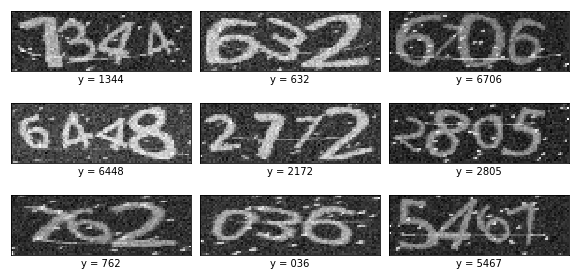

In [2]:
# define a função  para desenhar 9 imagens
def plot_images(images, cls_true, cmap='binary'):
    assert len(images) == len(cls_true) == 9
    
    # Cria gráfico 3x3
    fig, axes = plt.subplots(3, 3, figsize=(10,5))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for i, ax in enumerate(axes.flat):
        # plota a imagem
        ax.imshow(images[i], cmap=cmap)
       
        # mostra a previsão
        true_label = cls_true[i].astype(str).tolist()
        while true_label[0] == '10': # retira os nulos
            true_label.pop(0)

        xlabel = "y = " + ''.join(true_label)
        
        # mostra a previsão embaixo (x-axis)
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

    
# aplica tranformações de aumento em nove CAPTCHAs
img_for_plt, label_for_plot = X_train[:9], y_train[:9].argmax(2)   
img_for_plt = img_for_plt + np.ones(img_for_plt.shape) * 1 # sumula ajuste de luminosidade
img_for_plt = img_for_plt + np.random.normal(0,0.3,img_for_plt.shape) # sumula adição de ruido (desvio padrãod de 0.3)
plot_images(img_for_plt, label_for_plot)

Como podemos ver, as imagens continuam identificáveis. Note também como o digito '1' e '7' se parecem em alguns casos em que estão inclinados. Além disso, alguns dígitos são tão finos que parecem ruído da imagem. Aqui conseguimos visualizar facilmente o que está escrito nas imagens pois temos acesso direto aos dígitos que as geraram, mas é provável que um humano não consiga uma acurácia perfeita em uma base de dados construída com esses CAPTCHAs. Não podemos ter certeza, mas acreditamos que a performasse humana nesses CAPTCHAs não passe de 95%.

### Construindo o modelo de rede neural convolucional
Antes de começar a construir nosso modelo, vamos definir todos os híper-parâmetros em um único lugar, assim, caso precisemos ajustá-los poderemos fazê-lo mais facilmente, sem precisar ficar procurando ao longo do código. 

A taxa de aprendizado é o híper-parâmetro mais importante para um bom aprendizado. Essencialmente, ela determina o tamanho do passo dado em cada iteração na superfície de custo, em direção a um ponto de mínimo. Nós verificamos que no inicio do aprendizado, uma taxa tão grande como de 0.01 não é problema e garante uma convergência mais rápida. No final do aprendizado, é recomendado baixá-la para algo como 0.001, de forma a possibilitar uma melhor exploração da superfície de custo, achando assim locais mais baixos que seriam difíceis de encontrar com uma taxa de aprendizado muito alta. Aqui, vamos atrasar propositalmente o treinamento utilizando uma taxa de aprendizado bem baixa, de forma que passamo visualizar a acurácia de treino e validação subindo ao longo do treinamento. Se isso não for feito, o treinamento convergirá tão rápido para uma performance alta que a visualização do processo se torna sem sentido.

Além disso, vamos manter o tamanho do mini-lote em 50, pois precisamos não apenas de estimativas razoáveis do gradiente, como também das estatísticas de média e variância para garantir que a normalização do mini-lote proceda corretamente, acelerando assim o aprendizado. O resto dos hiper-parâmetros não precisam de tanto cuidado para ajustar. É suficiente manter a probabilidade de *dropout* em 50%, o coeficiente de regularização L2 das camadas densas em 0.001. Para aumentar artificialmente os dados, vamos adicionar ruido gaussiano centrado em zero e com desvio padrão de 0.3 e vamos ajustar a luminosidade aleatoriamente em no máximo 1.

A arquitetura da rede será a seguinte:

<table>
  <tr>
    <th>Camada</th>
    <th>Mapa representativo</th>
    <th>Kernel/Filtro</th>
  </tr>
  <tr>
    <td>Entrada</td>
    <td>imagem 32x96x1</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Convolucional</td>
    <td>mapa 32x96x8</td>
    <td>Convolução 5x5, passada de 1 por 1</td>
  </tr>
  <tr>
    <td>Agrupamento</td>
    <td>mapa 16x48x8</td>
    <td>Max 2x2, passada de 2 por 2</td>
  </tr>
  <tr>
    <td>Convolucional</td>
    <td>mapa 16x48x16</td>
    <td>Convolução 5x5, passada de 1 por 1</td>
  </tr>
  <tr>
    <td>Agrupamento</td>
    <td>mapa 8x24x16</td>
    <td>Max 2x2, passada de 2 por 2</td>
  </tr>
  <tr>
    <td>Convolucional</td>
    <td>mapa 8x24x32</td>
    <td>Convolução 5x5, passada de 1 por 1</td>
  </tr>
  <tr>
    <td>Agrupamento</td>
    <td>mapa 4x12x32</td>
    <td>Max 2x2, passada de 2 por 2</td>
  </tr>
  <tr>
    <td>Convolucional</td>
    <td>mapa 4x12x64</td>
    <td>Convolução 3x3, passada de 1 por 1</td>
  </tr>
  <tr>
    <td>Agrupamento</td>
    <td>mapa 2x6x64</td>
    <td>Max 2x2, passada de 2 por 2</td>
  </tr>
  <tr>
    <td>Densa</td>
    <td>mapa 1x128</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Dropout</td>
    <td>mapa 1x128</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Densa</td>
    <td>mapa 1x64</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Saída</td>
    <td>classe 6x11</td>
    <td>-</td>
  </tr>
</table>

In [3]:
# Hiper-parametros de otimização
learning_rate = 0.001 # taxa de aprendizado
batch_size = 50 # tamanho do mini-lote
restore = False # para restaurar um modelo previamente treinado

# Hiper-parametros de regularização
keep_prob_train = 0.5 # probabilidade de manter os dados no dropout
gamma = 1e-3 # coefiente de regularização L2 dos parâmetros das camadas densas
max_delta = 1 # quantidade de luminosidade máxima para ajustar
noise = 0.3 # desvio padrão do ruido para adicionar

# Quantidade de treinamento
training_iters = 15000 # iterações de treinamento
display_step = 1000 # regularidade para mostrar resultados
min_val_acc = 95 # acurácia mínima no set de validação para salvar

# Hiper-parametros da Rede Neural (se manipulados, terá que treinar do zero)
img_h = 32 # altura da imagem 
img_w = 96 # largura da imagem depois de cortar (deve ser múltiplo de 8)
CL1_depth = 8 # profundidade do kernel da primeira camada convolucioal
CL2_depth = 16 # profundidade do kernel da segunda camada convolucional
CL3_depth = 32 # profundidade do kernel da terceira camada convolucional
CL4_depth = 64 # profundidade do kernel da quarta camada convolucional
DL1_size = 128 # tamanho da primeira camada densa
DL2_size = 64 # tamanho da segunda camada densa
n_classes = 11  # quantidade de saida (10 dígitos mais nulo)
seq_len = 6 # tamanho da máxima sequência de dígitos

Mesmo com a ajuda de software moderno, a construção de um modelo de rede neural não é tarefa fácil. Aqui, vamos utilizar a biblioteca TensorFlow, que já é de alto nível de abstração, mas mesmo assim pode ser bem complicada a primeira vista. Para facilitar nossa tarefa, vamos começar definindo funções que construirão as camadas da nossa rede neural. Dentro da função das camada, vamos implementar normalização do mini-lote para acelerar no treinamento, conforme discutido acima.

O primeiro argumento para ambas as funções das camadas da rede neural será a imagem - no caso da primeira camada - ou mapa representativo da imagem - no caso das demais camadas. Em seguida, teremos os parâmetros a serem aprendidos, $\pmb{\hat{w}}$, e os valores $\pmb{\hat{\beta}}$ e $\pmb{\hat{\gamma}}$ para implementar a normalização da camada. No caso da camada convolucional, também colocaremos como argumento o tamanho da passada do *kernel*. Em todas as camadas será utilizada a função ReLU como forma introduzir a não linearidade. 

In [4]:
import tensorflow as tf

def conv2d(img, w, beta, gamma, name, s=1):

    conv = tf.nn.conv2d(img, w, strides=[1, s, s, 1], padding='SAME') # faz convolução
    batch_mean, batch_var = tf.nn.moments(conv,[0]) # calcula os momentos 1 e 2 do batch

    # aplica normalização do output
    conv = tf.nn.batch_normalization(conv,batch_mean,batch_var,beta,gamma,1e-3)
    return tf.nn.relu(conv, name=name) # aplica não linearidade


def dense(img, wfc, beta, gamma, name):
    fc = tf.matmul(img, wfc) # faz a multiplicação de matriz
    batch_mean, batch_var = tf.nn.moments(fc,[0]) # calcula os momentos 1 e 2 do batch

    # aplica normalização do output
    fc = tf.nn.batch_normalization(fc,batch_mean,batch_var,beta,gamma,1e-3)
    return tf.nn.relu(fc, name=name) # aplica não linearidade

Nos também vamos utilizar uma camada de agrupamento. Como argumentos, teremos mais uma vez o mapa representativo da imagem. Os outros dois argumentos serão o tamanho do quadriculado de maximização, que nós colocaremos um padrão de 2x2, e o tamanho da passada do agrupamento, que nós colocaremos como padrão 2x2. Nossa intenção com essa camada será reduzir a altura e largura da imagem, como já discutido acima.

In [5]:
def max_pool(img, name, kk=2, ks=2):
    return tf.nn.max_pool(img, ksize=[1, kk, kk, 1], strides=[1, ks, ks, 1], padding='SAME', name=name)

Definiremos agora as funções de aumento de dados:

In [6]:
def augment(image):
    image = image + tf.random_normal([img_h, img_w, 1], 0, noise) # adiciona ruído
    image = tf.image.random_brightness(image, max_delta, seed=None) # ajusta a luminosidade aleatoriamente
    return image

Com tudo isso pronto, podemos começar a construir nosso modelo. 

#### Construindo um grafo TensorFlow
Por questões de otimização, o TensorFlow divide o programa de redes neurais em duas partes: construção do grafo e execução do grafo. Assim, teremos que fazer praticamente um outro programa em uma linguagem TensorFlow, com suas próprias variáveis e funções. Esse programa será feito na etapa de construção do grafo. A primeira coisa que devemos fazer é definir os *inputs* desse programa. Esses *inputs* serão os nossos dados $\pmb{X}$ e $\pmb{y}$. Como a probabilidade de *dropout* varia de no momento da inferência, ela também será um *input* do grafo. Além disso, poderemos utilizá-la para identificar se estamos treinando ou testando e aplicar o aumento artificial de dados apenas no primeiro caso.

In [7]:
tf_x_input = tf.placeholder(tf.float32, [None, img_h, img_w], name='X_input')

# reformata input para forma de imagem requerida pelo tf (h, w, d)
tf_X = tf.reshape(tf_x_input, shape=[-1, img_h, img_w, 1]) 
tf_y_input = tf.placeholder(tf.int64, [None, seq_len, n_classes], name='y_input')
tf_keep_prob = tf.placeholder(tf.float32) # probabilidade de dropout no grafo

# aumenta os dados se treinando
tf_X = tf.cond(tf.less_equal(tf_keep_prob, 0.98), # usa prob de dropout para saber se está treinando
           lambda: tf.map_fn(lambda image: augment(image), tf_X), # caso treinando, aumenta os dados
           lambda: tf_X) # caso testanto, mantém os dados

O próximo passo será definir as variáveis do grafo. Essas variáveis serão os parâmetros do modelo e o TensorFlow poderá ajustá-los no processo de otimização. Para facilitar o treinamento, vamos inicializar esses parâmetros segundo sigerido por Glorot and Bengio (2010):  $\pmb{W_{ij}}\sim U(-\sqrt{\frac{6}{m+n}}, -\sqrt{\frac{6}{m+n}})$, onde m é o tamanho da entrada e n é o número da saída da camada.

In [8]:
# Inicialização dos parâmetros
init_wc1 = np.sqrt(6.0 / (img_w * img_h * 1 + img_w/2 * img_h/2 * CL1_depth))
init_wc2 = np.sqrt(6.0 / (img_w/2 * img_h/2 * CL1_depth + img_w/4 * img_h/4 * CL2_depth))
init_wc3 = np.sqrt(6.0 / (img_w/4 * img_h/4 * CL2_depth + img_w/8 * img_h/8 * CL3_depth))
init_wc4 = np.sqrt(6.0 / (img_w/8 * img_h/8 * CL3_depth + img_w/16 * img_h/16 * CL4_depth))
init_wfc1 = np.sqrt(6.0 / (img_w/16 * img_h/16 * CL4_depth + DL1_size))
init_wfc2 = np.sqrt(6.0 / (DL1_size + DL2_size))
init_out = np.sqrt(6.0 / (DL2_size + n_classes))

# W da camada convolucional 1, quadriculado do kernel de 5x5
wc1 = tf.Variable(tf.random_uniform([5, 5, 1, CL1_depth],
                                    minval=-init_wc1, maxval=init_wc1), name='wc1')

# W da camada convolucional 1, quadriculado do kernel de 5x5
wc2 = tf.Variable(tf.random_uniform([5, 5, CL1_depth, CL2_depth],
                                    minval=-init_wc2, maxval=init_wc2), name='wc2')

# W da camada convolucional 3, quadriculado do kernel de 5x5
wc3 = tf.Variable(tf.random_uniform([5, 5, CL2_depth, CL3_depth],
                                    minval=-init_wc3, maxval=init_wc3), name='wc3')

# W da camada convolucional, quadriculado do kernel de 3x3
wc4 = tf.Variable(tf.random_uniform([3, 3, CL3_depth, CL4_depth],
                                    minval=-init_wc4, maxval=init_wc4), name='wc4')

# W da camada densa 1, a imagem terá reduzido por um fator 2 quatro vezes
wfc1 = tf.Variable(tf.random_uniform([img_h/16 * img_w/16 * CL4_depth, DL1_size],
                                     minval=-init_wfc1, maxval=init_wfc1), name='wfc1')

# W da camada densa 2
wfc2 = tf.Variable(tf.random_uniform([DL1_size, DL2_size],
                                     minval=-init_wfc2, maxval=init_wfc2), name='wfc2')

# W das camada de saida para cada dígito possível
wout_log1 = tf.Variable(tf.random_uniform([DL2_size, n_classes],
                                          minval=-init_out, maxval=init_out), name='wout_log1')

wout_log2 = tf.Variable(tf.random_uniform([DL2_size, n_classes],
                                          minval=-init_out, maxval=init_out), name='wout_log2')

wout_log3 = tf.Variable(tf.random_uniform([DL2_size, n_classes],
                                          minval=-init_out, maxval=init_out), name='wout_log3')

wout_log4= tf.Variable(tf.random_uniform([DL2_size, n_classes],
                                         minval=-init_out, maxval=init_out), name='wout_log4')

wout_log5= tf.Variable(tf.random_uniform([DL2_size, n_classes],
                                         minval=-init_out, maxval=init_out), name='wout_log5')

wout_log6= tf.Variable(tf.random_uniform([DL2_size, n_classes],
                                         minval=-init_out, maxval=init_out), name='wout_log6')


# Variáveis de normalização das camadas convolucionais
bc1 = tf.Variable(tf.zeros([CL1_depth]), name='bc1')
gc1 = tf.Variable(tf.ones([CL1_depth]), name='gc1')

bc2 = tf.Variable(tf.zeros([CL2_depth]), name='bc2')
gc2 = tf.Variable(tf.ones([CL2_depth]), name='gc2')

bc3 = tf.Variable(tf.zeros([CL3_depth]), name='bc3')
gc3 = tf.Variable(tf.ones([CL3_depth]), name='gc3')

bc4 = tf.Variable(tf.zeros([CL4_depth]), name='bc4')
gc4 = tf.Variable(tf.ones([CL4_depth]), name='gc4')

# Variáveis de normalização das camadas densas
bfc1 = tf.Variable(tf.zeros([DL1_size]), name='bfc1')
gfc1 = tf.Variable(tf.ones([DL1_size]), name='gfc1')

bfc2 = tf.Variable(tf.zeros([DL2_size]), name='bfc2')
gfc2 = tf.Variable(tf.ones([DL2_size]), name='gfc2')

# Viés das camadas de saida
bout_log1 = tf.Variable(0.1 * tf.random_normal([n_classes]), name='bout_log1')
bout_log2 = tf.Variable(0.1 * tf.random_normal([n_classes]), name='bout_log2')
bout_log3 = tf.Variable(0.1 * tf.random_normal([n_classes]), name='bout_log3')
bout_log4 = tf.Variable(0.1 * tf.random_normal([n_classes]), name='bout_log4')
bout_log5 = tf.Variable(0.1 * tf.random_normal([n_classes]), name='bout_log5')
bout_log6 = tf.Variable(0.1 * tf.random_normal([n_classes]), name='bout_log6')

Finalmente, apos adicionar todas essas variáveis, podemos montar nosso modelo de rede neural. Faremos uma rede de 6 camadas ocultas, sendo quatro delas convolucionais, seguidas por agrupamento de máximo. As duas últimas camadas serão densas e entre elas haverá *dropout*.

In [9]:
# Primeira camada convolucional, entrada é uma imagem 32x96x1
conv1 = conv2d(tf_X, wc1, bc1, gc1, name='conv_l1')
conv1 = max_pool(conv1, name='max_pool_l1') # agrupamento de máximo  

# Segunda camada convolucional, entrada é um mapa 16x48x8
conv2 = conv2d(conv1, wc2, bc2, gc2, name='conv_l2')
conv2 = max_pool(conv2, name='max_pool_l2') # agrupamento de máximo

# Terceira camada convolucional, entrada é um mapa 8x24x16
conv3 = conv2d(conv2, wc3, bc3, gc3, name='conv_l3')
conv3 = max_pool(conv3, name='max_pool_l3') # agrupamento de máximo

# Quarta camada convolucional, entrada é um mapa 4x12x32
conv4 = conv2d(conv3, wc4, bc4, gc4, name='conv_l4')
conv4 = max_pool(conv4, name='max_pool_l4') # agrupamento de máximo
conv4 = tf.reshape(conv4, [-1, wfc1.get_shape().as_list()[0]]) # Reformata o output

# Primeira camada densa, entrada é um mapa 2x6x64, achatada 
fc1 = dense(conv4, wfc1, bfc1, gfc1, name='fc1')
fc1 = tf.nn.dropout(fc1, tf_keep_prob, name='drop_out') # dropout

# Segunda camada densa
fc2 = dense(fc1, wfc2, bfc2, gfc2, name='fc2')

# Camada de saída
logits1 = tf.matmul(fc2, wout_log1) + bout_log1
logits2 = tf.matmul(fc2, wout_log2) + bout_log2
logits3 = tf.matmul(fc2, wout_log3) + bout_log3
logits4 = tf.matmul(fc2, wout_log4) + bout_log4
logits5 = tf.matmul(fc2, wout_log5) + bout_log5
logits6 = tf.matmul(fc2, wout_log6) + bout_log6

A camada da nossa rede neural será um vetor de escores, chamado geralmente de *logit*. Vamos representar cada um desses escores pela letra $z$. Para converter esses escorem em probabilidades, vamos passá-los por uma função *softmax*: 

$$\hat{y}=\frac{e^z_i}{\sum e^z_i}$$

Note como acima temos 6 *logits*, um para cada digito possível na sequência do CAPTCHA. Ao passarmos cada um deles pela função *softmax* teremos a probabilidade de cada um dos 11 dígitos possíveis para cada dígito da sequência.


Para treinar nosso modelo, vamos usar a função custo de entropia cruzada entre cada vetor *one-hot* do dígito real e o vetor de probabilidade previsto pela função *softmax*:

$$L = -\sum [y_i log(\hat{y_i}) + (1-y_i) log(1-\hat{y_i})]$$

Essa função custo tem várias propriedade úteis, como ter grandes gradientes para respostas erradas e possibilitar melhoras de previsão mesmo quando a rede já está acertando perfeitamente todos os exemplos. Quando isso acontece, a entropia cruzada ainda terá um valor positivo e poderá ser minimizada aumentando a probabilidade do dígito correto.

Por fim, para regularização da camada densa, vamos adicionar à função custo a norma L2 dos parâmetros dessas camadas, multiplicado pelo híper-parâmetro $\gamma$ de normalização.

Nossa previsão será feita via empilhamento dos vetores de probabilidade previsto. Assim, poderemos converter desses vetores para a sequência de dígitos simplesmente utilizando a função $argmax$ em cada linha.

In [10]:
# função custo com regularização
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits1, tf_y_input[:,0])) +\
    tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits2, tf_y_input[:,1])) +\
    tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits3, tf_y_input[:,2])) +\
    tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits4, tf_y_input[:,3])) +\
    tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits5, tf_y_input[:,4])) +\
    tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits6, tf_y_input[:,5])) +\
    gamma*tf.nn.l2_loss(wfc1) +\
    gamma*tf.nn.l2_loss(wfc2)
    
# previsão
prediction = tf.pack([tf.nn.softmax(logits1),
                     tf.nn.softmax(logits2),
                     tf.nn.softmax(logits3),
                     tf.nn.softmax(logits4),
                     tf.nn.softmax(logits5),
                     tf.nn.softmax(logits6)],
                    axis=1, name='prediction')

Para otimizar, usaremos o algoritmo Adam, que é uma variação do gradiente descendente. Este algoritmo é pode ser visto como uma adaptação para incluir momentos no algoritmo de RMSprop, que por sua vez é um otimizador de taxa de aprendizado adaptativa. Nós optamos pelo Adam pois assim não precisamos gastar muito tempo ajustando a taxa de aprendizado, um processo que seria muito custoso caso ela não fosse adaptativa. Além disso, o Adam pode fornecer uma convergência mais rápida do que RMSprop por incluir momentos.

In [11]:
global_step = tf.Variable(initial_value=0, name='global_step', trainable=False)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step)

Para implementar a parada precipitada e evitar sobre ajustamento, nós vamos criar um local para salvar o modelo treinado apenas quando houver melhorias na acurácia de validação. Para isso, vamos criar um objeto TensorFlow que salva o modelo. É importante entender como esse objeto funciona para evitar comportamentos indesejáveis.

O que ele faz é salvar o valor corrente das variáveis do grafo no disco do computador. Para restaurar as variáveis, o objeto precisa que as variáveis que salvou já estejam presentes no grafo e tenham o mesmo nome de quando foram salvas. Isso pode ser um problema em notebook Jupyter, pois podemos rodar uma célula várias vezes e assim adicionamos ao grafo variáveis com nomes diferentes. Para ver como isso acontece, experimente retirar os comentários da célula abaixo e rodá-la várias vezes. Você verá que o nome da variável mudará a cada vez, pois estamos adicionando uma variável nova ao grafo toda vez que rodarmos a célula. Após esse experimento, é recomendável comentar a célula novamente, resetar  o notebook e rodá-lo de novo, pois a adição da variável abaixo ao grafo pode gerar problemas de *checkpoit*s.

In [12]:
# var = tf.Variable(tf.random_uniform([1]))
# print var

Para impedir que o TensorFlow cria adicione outras variáveis ao grafo, é preciso limpá-lo antes com ` tf.reset_default_graph()`. No entanto, como utilizamos muitas células do notebook para adicionar variáveis, não é possível limpar o grafo em cada uma delas sem resetar as variáveis previamente definidas. Assim, permanece o risco de definir variáveis com nomes diferentes e impedir a restauração de modelos salvos. A sugestão é então sempre rodar o notebook como um todo, em vez de cada célula individualmente.

In [13]:
saver = tf.train.Saver() # Para salvar o modelo
init = tf.global_variables_initializer() # para inicializar as variáveis

save_dir = 'DECAPCHAcheckpoints/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

Falta apenas definir a nossa métrica de performance. Nós vamos utilizar uma simples medida de acurácia, que retorna a porcentagem de CAPTCHAs devidamente adivinhados. Note que a rede precisará acertar todos os dígitos do CAPTCHA para que consideremos um acerto. A forma como faremos isso é utilizar a função $argmax$ ao longo da segunda dimensão do tensor de alvos $\pmb{y}$, ou seja, a dimensão de cada dígito (lembre que a forma desse tensor é `[tamanho_da_amostra, quantidade_de_dígitos_da_sequência, dígitos_possíveis]`.

Também vamos inicializar algumas listas para armazenar as métricas de aprendizado, tanto para visualizar o aprendizado a cada iteração quanto para possibilitar a parada precipitada com base na acurácia de validação

In [14]:
def accuracy(pred_y, true_y):
    pred_labels = np.argmax(pred_y, 2)
    true_labels = np.argmax(true_y, 2)
    return  np.all(pred_labels == true_labels, 1).mean() * 100

# para parada do treinamento e checkpoints 
valid_acc, train_acc, train_loss = [], [], []

#### Rodando o grafo TensorFlow

Agora que temos o grafo pronto e nossa métrica de performance, podemos rodá-lo para treinar nossa rede neural. O TensorFlow faz essa computação fora do Python, em uma linguagem de mais baixo nível e mais eficiente, de forma a acelerar o treinamento. Para fazer isso, primeiro definimos o que passar como *input* para o grafo que será rodado nessa linguagem mais eficiente, utilizando um dicionário de inputs `feed_dict`. Em seguida, nos rodamos as operações `global_step`, `optimizer` e `loss`. A primeira incrementará um contador, para sabermos em qual iteração de treino estamos. A segunda operação, `optimizer`, é a efetiva iteração de treinamento e é onde está a maioria do custo computacional. O efeito dela será rodar tudo no grafo que é necessário para computar a função minimizada (`loss`, nesse caso). Isso é o que chamamos de *forward pass* da rede neural. Em seguida, a mesma operação computará os gradientes de trás para frente, utilizando a regra da cadeia. Isso é o que chamamos de *backward pass*, quando ocorre a propagação das derivadas de trás para frente. Por fim, o otimizador atualizará as variáveis do grafo conforme a informação dos gradientes. Nós também vamos rodar a função custo (`loss`) para plotar o processo de aprendizado.

De tempos em tempos, vamos também calcular a acurácia de validação e salvaremos o modelo se ela apresentar melhoras.

In [15]:
with tf.Session() as sess:
    sess.run(init) # inicia as variáveis do grafo
    
    # restaura o modelo salvo, se for o caso
    if restore:
        ckpt = tf.train.get_checkpoint_state(save_dir)
        saver.restore(sess, ckpt.model_checkpoint_path)
        print "Sessão restaurada de ", ckpt.model_checkpoint_path, "."

    else:
        # apaga checkpoits antigos
        print 'Apagando checkpoits antigos'
        os.system("rm ./DECAPCHAcheckpoints/*") # comando linux para apagar chekpoints antigos
        
    t0 = time() # começa o cronometro

    # loop de treinamento
    for step in range(training_iters):
        
        # faz os mini-lotes
        offset = (step * batch_size) % (y_train.shape[0] - batch_size)
        batch_data = X_train[offset:(offset + batch_size), :, :]
        batch_labels = y_train[offset:(offset + batch_size), :]

        # roda uma iteração de treino
        feed_dict = {tf_x_input : batch_data,
                     tf_y_input : batch_labels,
                     tf_keep_prob: keep_prob_train}
        
        i_global, _, l = sess.run([global_step, optimizer, loss], feed_dict=feed_dict)
        train_loss.append(l)
        
        if (i_global % display_step == 0) or (step == training_iters - 1):

            print 'Tempo para rodar %d iterações:'%(step+1),round((time()-t0)/60, 3),'min'
            feed_train_dict = {tf_x_input : batch_data, tf_keep_prob:1.0}
            train_pred = sess.run(prediction, feed_dict=feed_train_dict)
            acc_train = accuracy(train_pred, batch_labels) 
            print 'Custo no min-lote na iteração %d: %.4f' % (i_global, l)
            print 'Acurácia no min-lote: %.1f%%' % acc_train 

            feed_val_dict = {tf_x_input : X_valid, tf_keep_prob:1.0}
            val_pred = sess.run(prediction, feed_dict=feed_val_dict)
            acc_val = accuracy(val_pred, y_valid) 
            print 'Acurácia de validação: %.1f%% \n' % acc_val 

            # para parada do treinamento
            valid_acc.append(acc_val)
            train_acc.append(acc_train)

            # salva o modelo com parada adiantada 
            if acc_val >= np.max(valid_acc) and acc_val >= min_val_acc:
                saver.save(sess, save_dir + 'model.ckpt', global_step=i_global+1)
                print("Checkpoint!\n")
                
        
    feed_test_dict = {tf_x_input : X_test, tf_keep_prob:1.0}
    test_pred = sess.run(prediction, feed_dict=feed_test_dict)
    acc_test = accuracy(test_pred, y_test) 
    print 'Acurácia de generalização: %.1f%% \n' % acc_test 
    
    

Apagando checkpoits antigos
Tempo para rodar 1000 iterações: 0.302 min
Custo no min-lote na iteração 1000: 3.3456
Acurácia no min-lote: 60.0%
Acurácia de validação: 76.0% 

Tempo para rodar 2000 iterações: 0.569 min
Custo no min-lote na iteração 2000: 2.3561
Acurácia no min-lote: 82.0%
Acurácia de validação: 90.5% 

Tempo para rodar 3000 iterações: 0.831 min
Custo no min-lote na iteração 3000: 1.3267
Acurácia no min-lote: 94.0%
Acurácia de validação: 93.0% 

Tempo para rodar 4000 iterações: 1.095 min
Custo no min-lote na iteração 4000: 1.7316
Acurácia no min-lote: 92.0%
Acurácia de validação: 95.0% 

Checkpoint!

Tempo para rodar 5000 iterações: 1.39 min
Custo no min-lote na iteração 5000: 1.2078
Acurácia no min-lote: 94.0%
Acurácia de validação: 97.5% 

Checkpoint!

Tempo para rodar 6000 iterações: 1.677 min
Custo no min-lote na iteração 6000: 0.9424
Acurácia no min-lote: 92.0%
Acurácia de validação: 96.5% 

Tempo para rodar 7000 iterações: 1.938 min
Custo no min-lote na iteração 7000

Os resultado acima mostram que após apenas algumas iterações de treino, nossa rede neural já consegue resolver CAPTCHAs com uma performance provavelmente melhor do que a humana. Lembre-se de que aqui colocamos uma taxa de aprendizado bem baixa para que a visualização do aprendizado pudesse ser feita de forma mais detalhada. No entanto, é possível conseguir uma convergência ainda mais rápida utilizando uma taxa de aprendizado maior, algo em torno de 0.01.

## Visualizando o aprendizado

Visualizar o processo de aprendizado de uma rede neural é importante por dois motivos, principalmente. O primeiro é que, ao colocar em um gráfico a evolução da acurácia de treino e de validação podemos ver em que regime de ajustamento estamos. Se vermos que RNA parou de treinar em um ponto que a acurácia de treino e validação são igualmente baixa, podemos saber que estamos em um regime de sub-ajustamento e seria melhor aumentar o modelo ou diminuir a regularização; se observarmos uma acurácia de teste quase perfeita e uma acurácia de validação baixa, podemos saber que estamos sobre ajustando o modelo e seria melhor diminuir seu tamanho ou aumentar a regularização.

O segundo motivo é que, ao plotar a evolução do custo, podemos ter noção da velocidade de convergência e assim ajustar a taxa de aprendizado para que a otimização seja mais rápida ou mais precisa.

Abaixo, podemos ver como a acurácia de treino e teste evolui ao longo das iterações. Também desenhamos a evolução do custo:

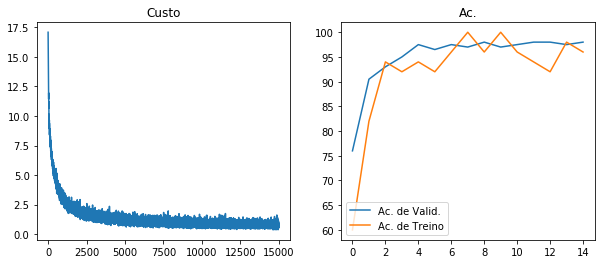

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# plota o custo por iteração
ax1.plot(range(len(train_loss)), train_loss)
ax1.set_title('Custo')

# plota a evolução da acurácia de validação e treino
ax2.plot(range(len(valid_acc)), valid_acc, label='Ac. de Valid.')
ax2.plot(range(len(train_acc)), train_acc, label='Ac. de Treino')
ax2.set_title('Ac.')
plt.legend(loc=3)
plt.show()


Podemos ver que nosso treinamento ocorreu sem problemas. Ambas as acurácias de treino e teste estão próximas e igualmente altas; além disso, a curva de custo parece convergir rapidamente e depois flutuar um pouco, como é esperado. Como a acurácia de teste ainda não está demasiadamente alta, podemos especular que treinando mais a rede seria possível conseguir uma performance melhor, mas já estamos bastante satisfeitos.

Na nossa visualização, também podemos ver os CAPTCHAs e as respectivas previsões produzidas pela rede neural convolucional:

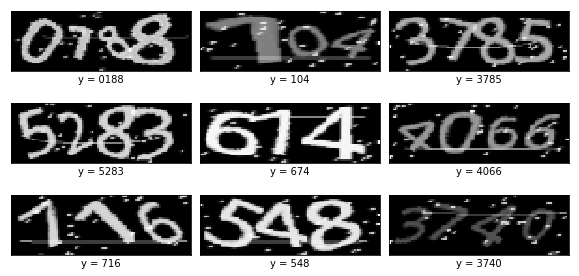

In [17]:
img_for_plt = X_test[:9, :, :]
label_for_plot = y_test[:9].argmax(2)
plot_images(img_for_plt, label_for_plot)

Abaixo, temos os valores verdadeiros das sequência dos CAPTCHAs acima.

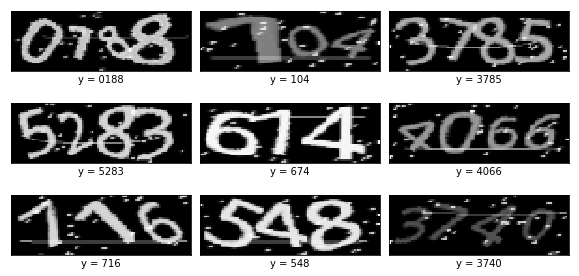

In [18]:
img_for_plt = X_test[:9, :, :]
label_hat_for_plot = test_pred[:9].argmax(2)
plot_images(img_for_plt, label_hat_for_plot)

Além de ver previsões de qualquer CAPTCHA, é interessante ver os exemplos do set de teste que a rede neural não conseguiu acertar. Talvez assim possamos ver se há algum tipo de imagem específica que gera dificuldades para a rede neural.

18 de 1000 CAPTCHAs do set de teste estão erradas


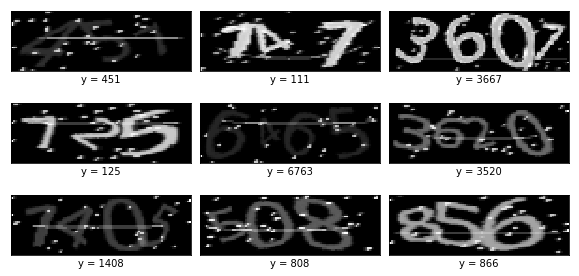

In [19]:
idx = (y_test.argmax(2) == test_pred.argmax(2)).all(axis=1)
idx = np.logical_not(idx)
print '%d de %d CAPTCHAs do set de teste estão erradas' % (idx.sum(), y_test.shape[0])
img_for_plt = X_test[idx, :, :][:9]
label_hat_for_plot = test_pred[idx].argmax(2)[:9]

plot_images(img_for_plt, label_hat_for_plot)

Bem, nós podemos entender porque a rede errou algumas dessas imagens. Alguns desse CAPTCHAs sequer são visíveis para nós humanos! Por outro lado, há CAPTCHAs que não vemos nenhuma dificuldade aparente. A nossa hipótese sobre esses erros de CAPTCHAs mais fáceis é que a rede simplesmente não treinou por tempo o suficiente. Normalmente, o processo de treinamento é bem maior do que apenas as 10000 iterações que fixamos, podendo chegar em dez vezes isso. Outra observação que corrobora esse hipótese é a semelhança entre as curvas de acurácia de treino e teste vistas acima.

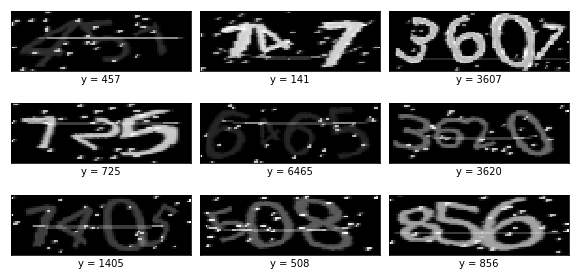

In [20]:
idx = (y_test.argmax(2) == test_pred.argmax(2)).all(axis=1)
idx = np.logical_not(idx)
img_for_plt = X_test[idx, :, :][:9]
label_hat_for_plot = y_test[idx].argmax(2)[:9]

plot_images(img_for_plt, label_hat_for_plot)

## Explorando mais fundo: uma tentativa de entender as abstrações aprendidas pela RNA

Para que possamos compreender o mundo a nossa volta é preciso que criemos abstrações semânticas de cada cena ou objeto que vemos. Não há ainda uma explicação de como fazemos isso exatamente, mas podemos especular a partir de alguns fatos estilizados sobre como percebemos a realidade. No processo classificar um objeto ou uma cena, precisamos antes codificá-lo em algum conjunto de representações. Por exemplo, se lhe for apresentado dois celulares, um produzido no ano 2016 e outro no ano 1994, você conseguirá dizer qual deles é o mais recente. Para isso, especula-se que seu cérebro codificará a imagem de ambos os celulares em alguma representação característica deles e então comparará essa codificação da imagem com abstrações internas que temos de um celular moderno e de um antigo. É apenas por conta dessa representação interna que somos capazes de imaginar. Por exemplo, se lhe pedirem para imaginar um celular antigo, você terá de recorrer às abstrações no seu cérebro que compõe tal imaginação; talvez então imagine um objeto cinzento e largo, com botões grande e uma antena na parte superior. Isso só é possível pois ao longo da sua existência, de alguma forma lhe foi possível assimilar de forma abstrata os conceitos associados à percepção visual de de botões, antenas e até mesmo celulares antigos. 

Uma outra especulação, talvez mais ambiciosa, é que não somos capazes de enxergar o que não entendemos, e que portanto o processo de abstração é de duas vias: para aprender a enxergar é preciso abstrair e para abstrair é preciso aprender a enxergar. Algumas evidências apontam que essa especulação não é de todo infundada. Por exemplo, tornando aos celulares, é provável que uma criança não seja capaz de imaginar um celular produzido em 1994 pois ela jamais foi apresentada a esse objeto, não tendo aprendido uma representação interna que remeta à esse conceito. É claro que se apresentássemos a ela um celular antigo, ela entenderá o que é sem muitas dificuldades, talvez com um pouco de estranheza. Isso porque ela já abstraiu toda a ideia de um celular, sendo que pouca esforço é necessário para incorporar o conceito de celular antigo às suas abstrações internas. Muito mais difícil seria, por exemplo, imaginar uma invenção revolucionária que acontecerá apenas na próxima década, algum objeto que não tenha similar atual. Perceba como não temos nenhuma base semântica para essa tarefa e é provável que ela seja impossível. Para entender melhor essa dificuldade, imagine um viajante do tempo pedido que um homem de 1700 imaginasse um celular e é fácil ver que esse pedido beira o cômico de tão absurdo. 

Se em humanos isso não passa de uma especulação, com redes neurais podemos ter certeza de que isso está correto. Com RNA, podemos ter acesso direto às representações aprendidas, pois temos controle e acesso fácil a cada neurônio. Com a nossa rede neural de CAPTCHAs, por exemplo, sabemos que a informação passa por várias camadas de neurônios, sendo que a última delas tem apenas 64. Esses 64 neurônios então precisam ser capazes de abstrair o conteúdo mais importante da imagem de forma que seja possível classificá-la entre diversos dígitos. Em outras palavras, a rede neural precisa codificar informação de uma imagem com 3072 dimensões (32x96 pixeis) em apenas 64 neurônios de forma que essa representação reduzida seja representativa o suficiente para possibilitar a classificação dos dígitos. 

Há [toda uma literatura](http://cs231n.github.io/understanding-cnn/) explorando formas de extrair essa representação interna da rede neural, mas não temos espaço para tratar de todas individualmente. Aqui, utilizaremos uma abordagem bastante simples e bastante efetiva. Em primeiro lugar, nós precisamos entender que a última camada oculta da rede neural produz uma representação condensada da imagem que é suficiente para a tarefa de classificação. Nós vamos então tentar reverter esse processo, de forma que possamos chegar da representação condensada de volta na imagem. Em termos mais simples, nós vamos fazer com que a rede neural artificial imagine de volta os CAPCHAs que lhe foram passados. Nós poderemos então visualizar essa imaginação da mesma forma que vimos os CAPTCHAs: como figuras.


### Codificando a informação em abstrações
O primeiro passo para visualizar as abstrações aprendidas é passar pela rede neural os nossos dados de treino e retirar o valor produzido pela última camada oculta:

In [21]:
with tf.Session() as sess:
    sess.run(init) # inicia as variáveis do grafo
    
    # restaura o modelo salvo
    ckpt = tf.train.get_checkpoint_state(save_dir)
    saver.restore(sess, ckpt.model_checkpoint_path)
    print "Sessão restaurada de ", ckpt.model_checkpoint_path, "."
    
    # começa a passar os dados de treino pela rede neural
    feed_dict = {tf_x_input : X_train[:1000], tf_keep_prob:1.0}
    feature_map = sess.run(fc2, feed_dict=feed_dict)
    
    # passa o resto dos dados em mini-lote para evitar problemas de memória
    for i in range(1000, X_train.shape[0], 1000):
        feed_dict = {tf_x_input : X_train[i:i+1000], tf_keep_prob:1.0}
        batch_X = sess.run(fc2, feed_dict=feed_dict)
        feature_map = np.concatenate((feature_map, batch_X), axis=0)

print 'Dimensões das abstrações: ', feature_map.shape

Sessão restaurada de  DECAPCHAcheckpoints/model.ckpt-15001 .
Dimensões das abstrações:  (50000, 64)


Após esse processo, cada imagem que antes tinha 3072 pixeis foi condensada nessas abstrações bem menores. Em seguida, nós vamos construir uma mini rede neural profunda que terá a tarefa de decodificar de volta em imagens as abstrações que a nossa rede para resolução de CAPTCHAs produziu.

Primeiro, vamos reformar nossa função de camada densa. Aqui, a única mudança será trocar a não linearidade de uma função ReLU para uma função tangente hiperbólica, pois verificamos que isso auxilia na decodificação da abstração.  

In [22]:
def dense(img, wfc, beta, gamma, name):
    fc = tf.matmul(img, wfc) # faz a multiplicação de matriz
    batch_mean, batch_var = tf.nn.moments(fc,[0]) # calcula os momentos 1 e 2 do batch

    # aplica normalização do output
    fc = tf.nn.batch_normalization(fc,batch_mean,batch_var,beta,gamma,1e-3)
    return tf.nn.tanh(fc, name=name) # aplica não linearidade

Em seguida, limpamos o grafo TensorFlow construído previamente, para assim evitar problemas ao construirmos nossa mini rede neural profunda para decodificar as abstrações.

In [23]:
tf.reset_default_graph() # limpa o grafo

# hiper-parâmetros
learning_rate = 0.001 # taxa de aprendizado
size_decode_1 = 512 # tamanho da primeira camada oculta 
size_decode_2 = 1024 # tamnho da segunda camada oculta
out = img_h*img_w # tamanho da imagemd e saída

# inputs do grafo
Xd_input = tf.placeholder(tf.float32, [None, 64], name='Xd_input') 
Xd_rec = tf.placeholder(tf.float32, [None, img_h, img_w], name='Xd_rec')
Xd_rec_rs = tf.reshape(Xd_rec, shape=[-1, img_h*img_w], name='Xd_rec_reshaped') # achata a imagem

# parâmetros do modelo
init_dec_1 = np.sqrt(6.0 / (feature_map.shape[1] + size_decode_1))
init_dec_2 = np.sqrt(6.0 / (size_decode_2 + n_classes))
init_out = np.sqrt(6.0 / (size_decode_2 + img_h*img_w))

wd1 = tf.Variable(tf.random_uniform([feature_map.shape[1], size_decode_1],
                                     minval=-init_dec_1, maxval=init_dec_1), name='wd1')

wd2 = tf.Variable(tf.random_uniform([size_decode_1, size_decode_2],
                                     minval=-init_dec_1, maxval=init_dec_1), name='wd2')

wd_out = tf.Variable(tf.random_uniform([size_decode_2, out],
                                     minval=-init_out, maxval=init_out), name='wd_out')


# Variáveis de normalização das camadas densas
bd_fc1 = tf.Variable(tf.zeros([size_decode_1]), name='bd_fc1')
gd_fc1 = tf.Variable(tf.ones([size_decode_1]), name='gd_fc1')

bd_fc2 = tf.Variable(tf.zeros([size_decode_2]), name='bd_fc2')
gd_fc2 = tf.Variable(tf.ones([size_decode_2]), name='gd_fc2')

bd_out = tf.Variable(tf.zeros([out]), name='bd_out')


# modelo de decodificador
fc_d1 = dense(Xd_input, wd1, bd_fc1, gd_fc1 , name='fcd1')
fc_d2 = dense(fc_d1, wd2, bd_fc2, gd_fc2, name='fcd2')
X_hat = tf.matmul(fc_d2, wd_out) + bd_out

# treinamento
cost = tf.reduce_sum(tf.pow(X_hat - Xd_rec_rs, 2))  # Função custo como sendo o erro quadrado
train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost)  # otimizador


Com o nosso modelo pronto, podemos então treiná-lo e usá-lo para decodificar as abstrações. Nós então passaremos todas as abstrações codificadas anteriormente por essa rede neural treinada e conseguiremos uma reconstrução da imagem a partir das abstrações aprendidas.

In [24]:
batch_size = 50
training_iters = 5000

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    print 'Treinando o decodificador..'
    for step in range(training_iters):
        
        # faz os mini-lotes
        offset = (step * batch_size) % (y_train.shape[0] - batch_size)
        batch_code = feature_map[offset:(offset + batch_size)]
        batch_decode = X_train[offset:(offset + batch_size)]
        
        feed_dict = {Xd_input:batch_code , Xd_rec:batch_decode}
        _, c = sess.run([train_op, cost], feed_dict=feed_dict)

    print 'Custo ou perda da reconstrução: %d' % (c)
    print 'Decodificando representações..'
    # começa a passar os dados de treino pelo decodificador
    feed_dict = {Xd_input: feature_map[:1000]}
    rec_imgs = sess.run(X_hat, feed_dict=feed_dict)
    
    for i in range(1000, X_train.shape[0], 1000):
        feed_dict = {Xd_input : feature_map[i:i+1000]}
        batch_X = sess.run(X_hat, feed_dict=feed_dict)
        rec_imgs = np.concatenate((rec_imgs, batch_X), axis=0)
    


Treinando o decodificador..
Custo ou perda da reconstrução: 117268
Decodificando representações..


Por fim, podemos visualizar as imaginações da rede neural plotando elas na forma decodificada em figuras:

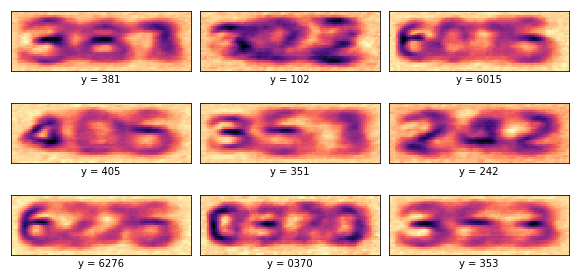

In [37]:
rec_imgs = rec_imgs.reshape((-1,32,96))
np.random.seed(14)
idx = np.random.randint(0,rec_imgs.shape[0], size=9)
img_for_plt = rec_imgs[idx]
label_hat_for_plot = y_train[idx].argmax(2)

plot_images(img_for_plt, label_hat_for_plot,cmap='magma')

Podemos perceber como essa abstrações são uteis para identificar a imagem. É importante também lembrar que nossa rede neural *não* foi treinada para reproduzir as imagens - como no caso de um [*autoencoder*](https://en.wikipedia.org/wiki/Autoencoder) - , mas sim para reconhecer dígitos. É realmente impressionante que, mesmo sem ter sido treinada parra isso, a RNA é capaz de reproduzir representações mais simples das imagens como subproduto da tarefa de classificação. Note também como as abstrações decodificadas são quase totalmente livres dos ruídos e traços presentes nos CAPCTHAs originais. Além disso, há traços mais escuros nos dígitos, sugerindo que essas formas são as mais características de cada um deles. Isso nos mostra como as RNAs de fato são capazes de aprender os conceitos que lhes ensinamos por meio dessas abstrações. Também mostra que há um mecanismo de atenção que percebe algumas partes da imagem mais do que outras. Isso é extremamente similar à forma como nós humanos enxergamos as cenas, com atenção direcionada.

Abaixo, temos as imagens originais, as que pedimos que a rede neural imaginasse:

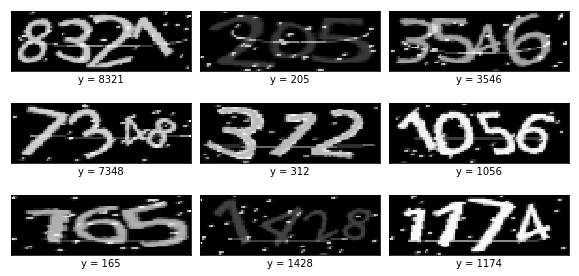

In [31]:
img_for_plt = X_train[idx]
label_hat_for_plot = y_train[idx].argmax(2)

plot_images(img_for_plt, label_hat_for_plot)